# 相关


In [1]:
import polars as pl
from plotnine import *

## Regression Plot


In [2]:
mpg = pl.read_csv("data/mpg.csv")
mpg.head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
str,str,f64,i64,i64,str,str,i64,i64,str,str
"""audi""","""a4""",1.8,1999,4,"""auto(l5)""","""f""",18,29,"""p""","""compact"""
"""audi""","""a4""",1.8,1999,4,"""manual(m5)""","""f""",21,29,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""manual(m6)""","""f""",20,31,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""auto(av)""","""f""",21,30,"""p""","""compact"""
"""audi""","""a4""",2.8,1999,6,"""auto(l5)""","""f""",16,26,"""p""","""compact"""


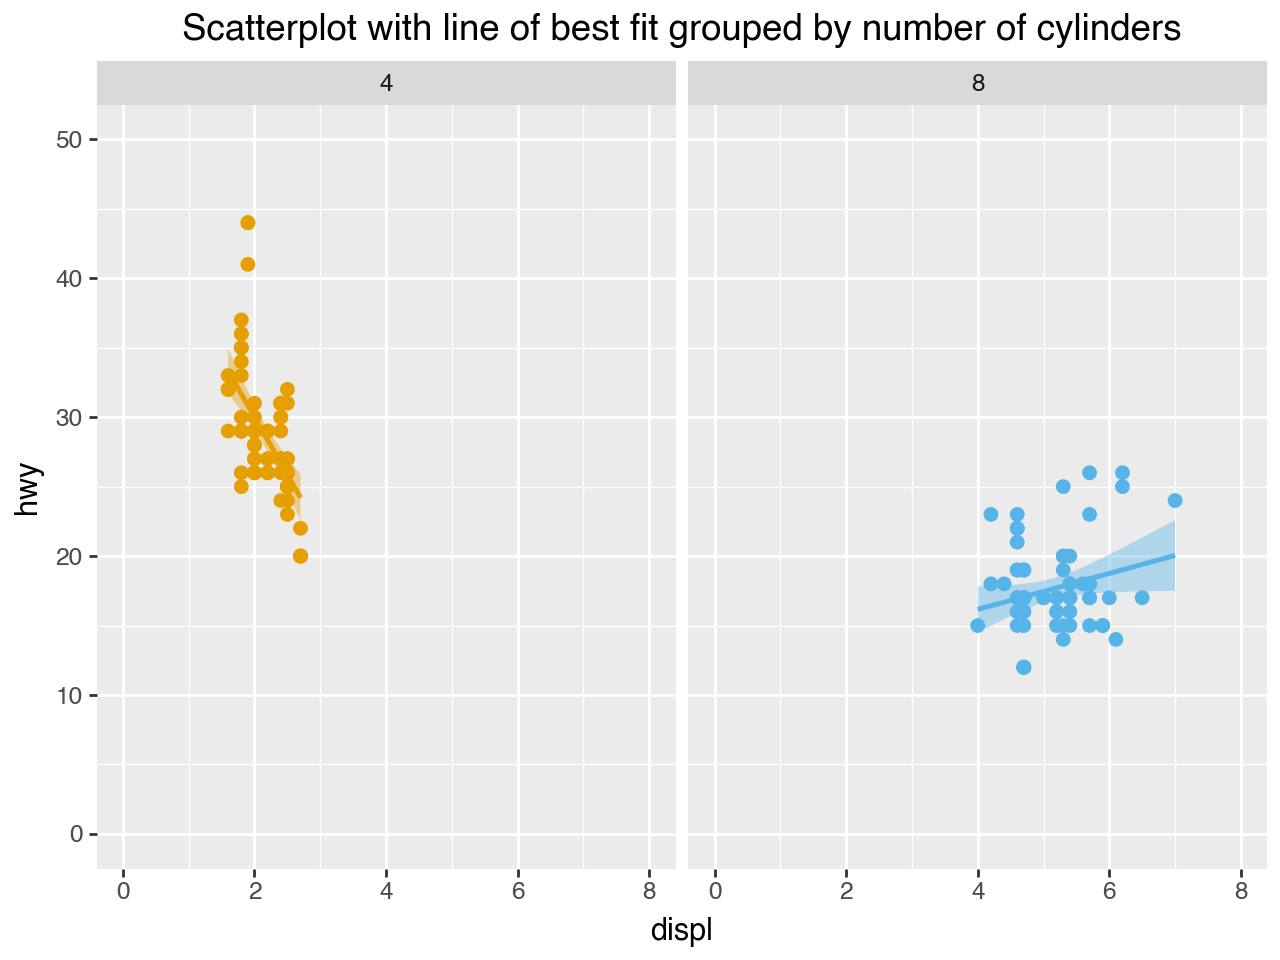

In [3]:
mpg_select = mpg.filter((pl.col("cyl") == 4) | (pl.col("cyl") == 8))

(
    ggplot(mpg_select, aes(x="displ", y="hwy", color="cyl", fill="cyl"))
    + geom_point(size=2)
    + geom_smooth(method="lm", size=1)
    + facet_wrap("cyl")
    + lims(x=(0, 8), y=(0, 50))
    + labs(title="Scatterplot with line of best fit grouped by number of cylinders")
    + theme(plot_title=element_text(hjust=0.5), legend_position="none")
    + scale_color_gradient(low="#E69F00", high="#56B4E9")
    + scale_fill_gradient(low="#E69F00", high="#56B4E9")
)

## Jittering


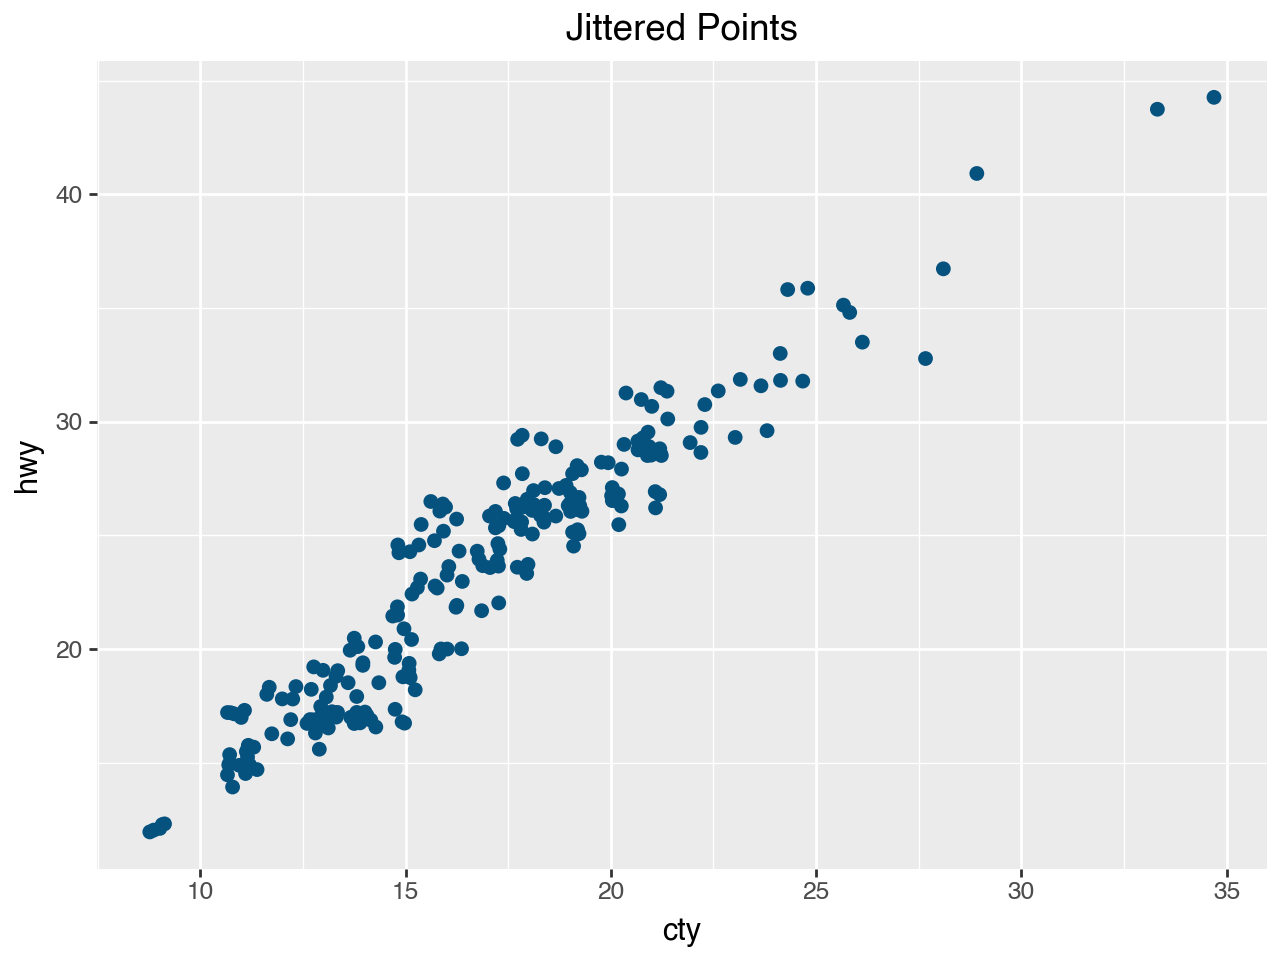

In [4]:
g = ggplot(mpg, aes(x="cty", y="hwy"))

(
    g
    + geom_jitter(height=0.5, size=2, color="#06527f")
    + labs(title="Jittered Points")
    + theme(plot_title=element_text(hjust=0.5))
)

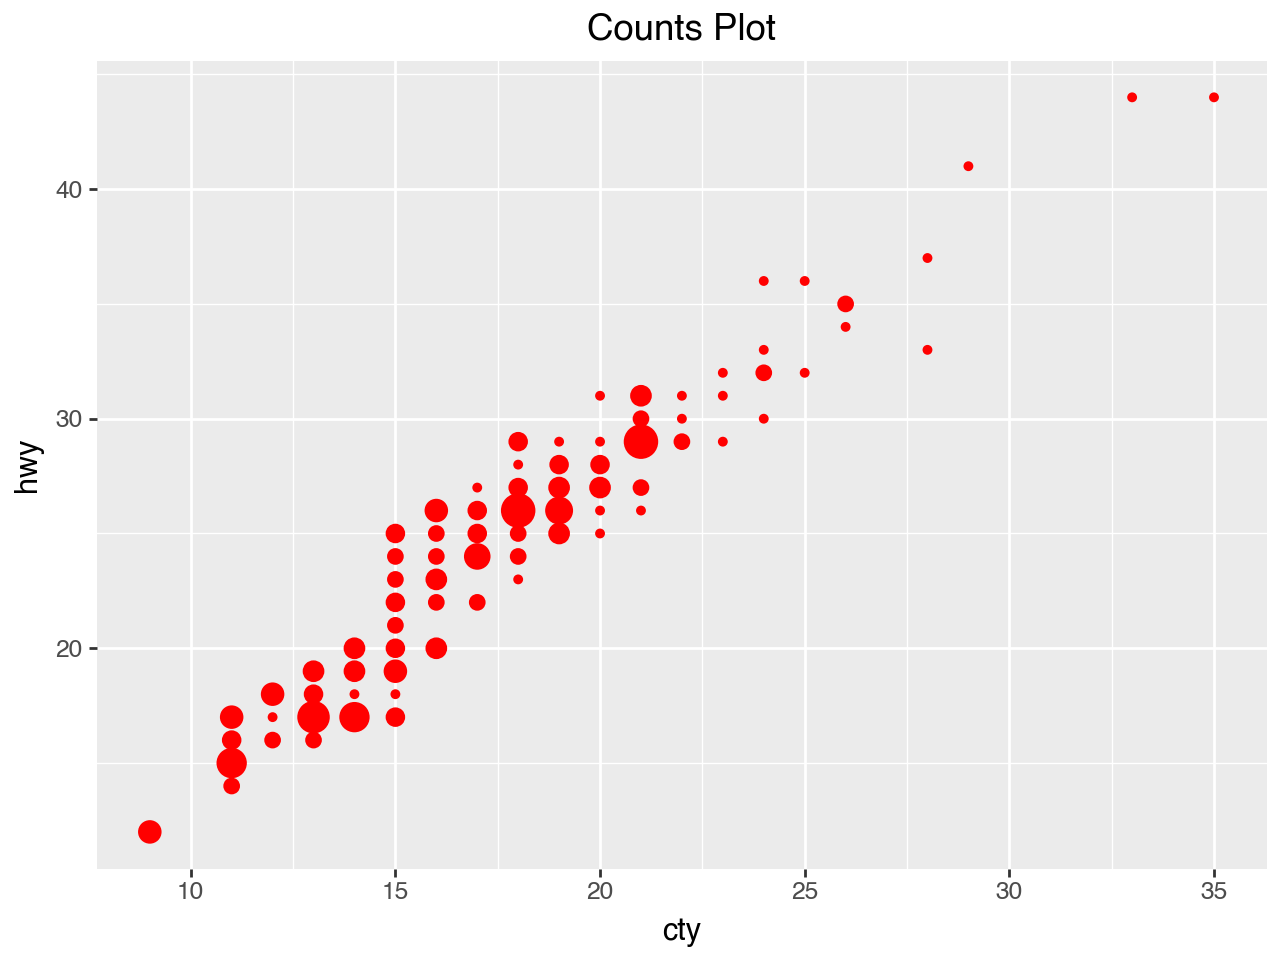

In [5]:
(
    g
    + geom_count(color="red")
    + labs(title="Counts Plot")
    + theme(plot_title=element_text(hjust=0.5), legend_position="none")
)

## FacetGrid

In [6]:
mtcars = pl.read_csv("data/mtcars.csv")
mtcars.head()

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars
f64,i64,f64,i64,f64,f64,f64,i64,i64,i64,i64,i64,str
4.582576,6,160.0,110,3.9,2.62,16.46,0,1,4,4,1,"""Mazda RX4"""
4.582576,6,160.0,110,3.9,2.875,17.02,0,1,4,4,1,"""Mazda RX4 Wag"""
4.774935,4,108.0,93,3.85,2.32,18.61,1,1,4,1,1,"""Datsun 710"""
4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,"""Hornet 4 Drive"""
4.32435,8,360.0,175,3.15,3.44,17.02,0,0,3,2,1,"""Hornet Sportabout"""


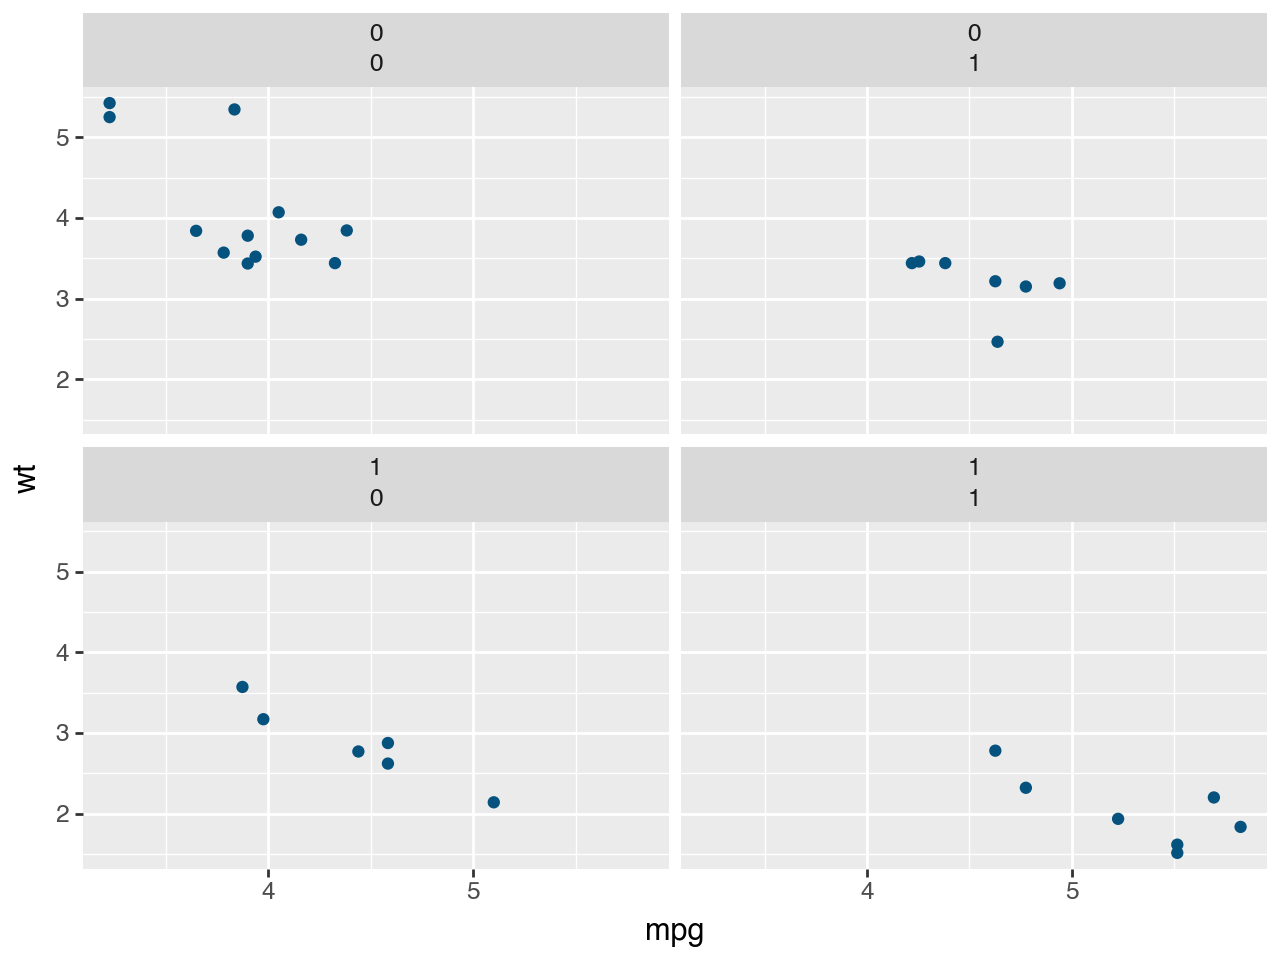

In [7]:
(
    ggplot(mtcars, aes("mpg", "wt"))
    + geom_point(color="#06527f")
    + facet_wrap(["am", "vs"])
)

## Heatmap


In [8]:
mtcars

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars
f64,i64,f64,i64,f64,f64,f64,i64,i64,i64,i64,i64,str
4.582576,6,160.0,110,3.9,2.62,16.46,0,1,4,4,1,"""Mazda RX4"""
4.582576,6,160.0,110,3.9,2.875,17.02,0,1,4,4,1,"""Mazda RX4 Wag"""
4.774935,4,108.0,93,3.85,2.32,18.61,1,1,4,1,1,"""Datsun 710"""
4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,"""Hornet 4 Drive"""
4.32435,8,360.0,175,3.15,3.44,17.02,0,0,3,2,1,"""Hornet Sportabout"""
…,…,…,…,…,…,…,…,…,…,…,…,…
5.51362,4,95.1,113,3.77,1.513,16.9,1,1,5,2,1,"""Lotus Europa"""
3.974921,8,351.0,264,4.22,3.17,14.5,0,1,5,4,0,"""Ford Pantera L"""
4.438468,6,145.0,175,3.62,2.77,15.5,0,1,5,6,1,"""Ferrari Dino"""


In [9]:
corr_matrix = mtcars.select(pl.selectors.by_dtype([pl.Float64, pl.Int64])).corr()
corr_matrix.head()

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,-0.858539,-0.867536,-0.787309,0.680312,-0.883453,0.420317,0.66926,0.593153,0.487226,-0.553703,0.730748
-0.858539,1.0,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,-0.695182
-0.867536,0.902033,1.0,0.790949,-0.710214,0.88798,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,-0.732073
-0.787309,0.832447,0.790949,1.0,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,-0.751422
0.680312,-0.699938,-0.710214,-0.448759,1.0,-0.712441,0.091205,0.440278,0.712711,0.69961,-0.09079,0.40043


In [10]:
corr_matrix2 = (
    corr_matrix.with_row_index()
    .unpivot(index="index")
    .with_columns(pl.col("index").cast(pl.Float32) + 1)
    .sort(by="value", descending=True)
)
corr_matrix2.head()

index,variable,value
f32,str,f64
1.0,"""mpg""",1.0
2.0,"""cyl""",1.0
3.0,"""disp""",1.0
4.0,"""hp""",1.0
6.0,"""wt""",1.0


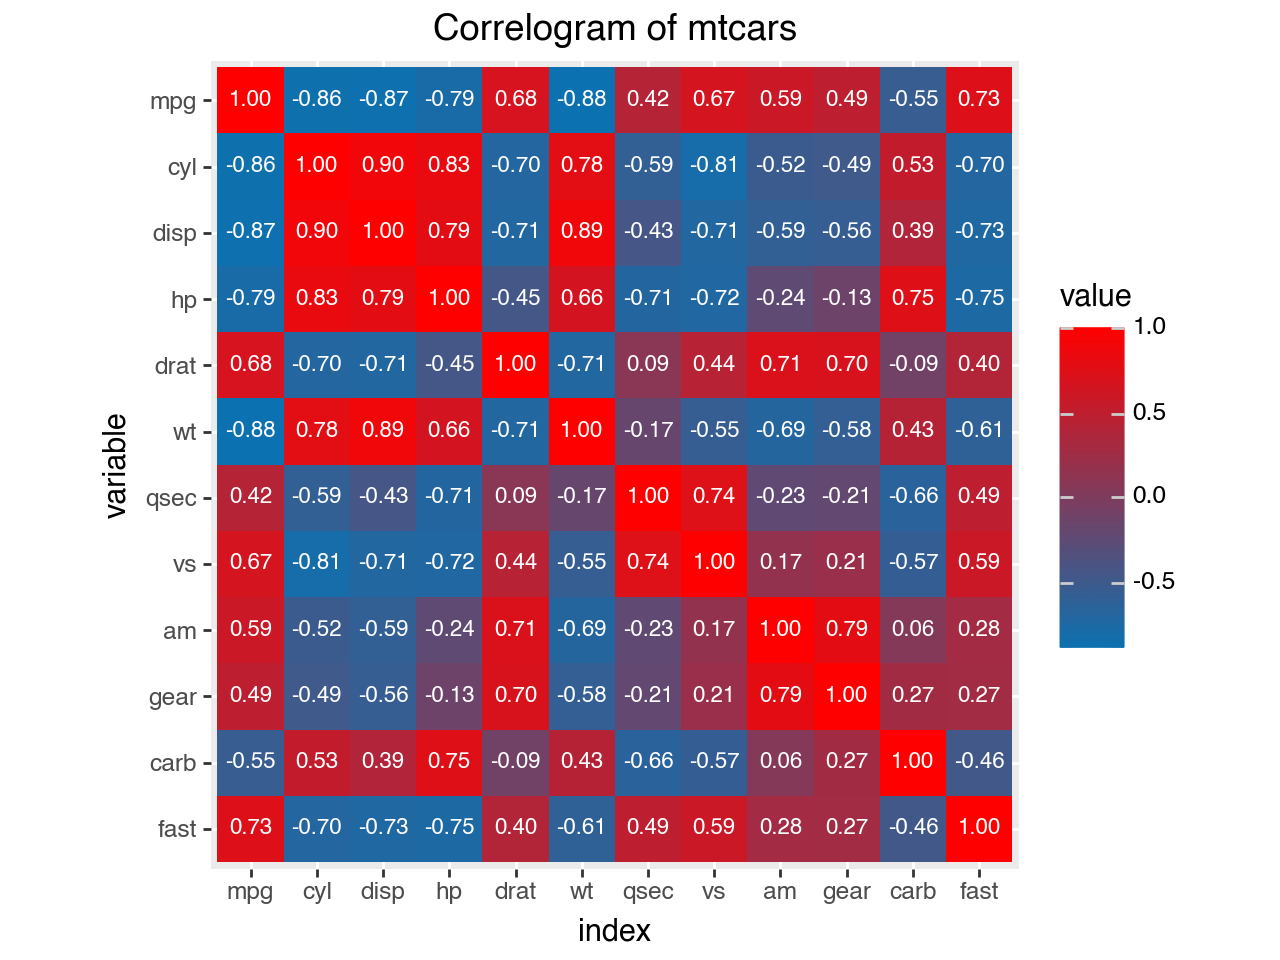

In [11]:
(
    ggplot(corr_matrix2, aes("index", "variable", fill="value"))
    + geom_tile()
    + scale_fill_gradient(low="#0c71b0", high="#ff0000")
    + geom_text(aes(label="value"), size=8, format_string="{:.2f}", color="white")
    + labs(title="Correlogram of mtcars")
    + scale_x_discrete(limits=corr_matrix.columns)
    + scale_y_discrete(limits=corr_matrix.columns[::-1])
    + coord_fixed()
)

## Marginal Plot


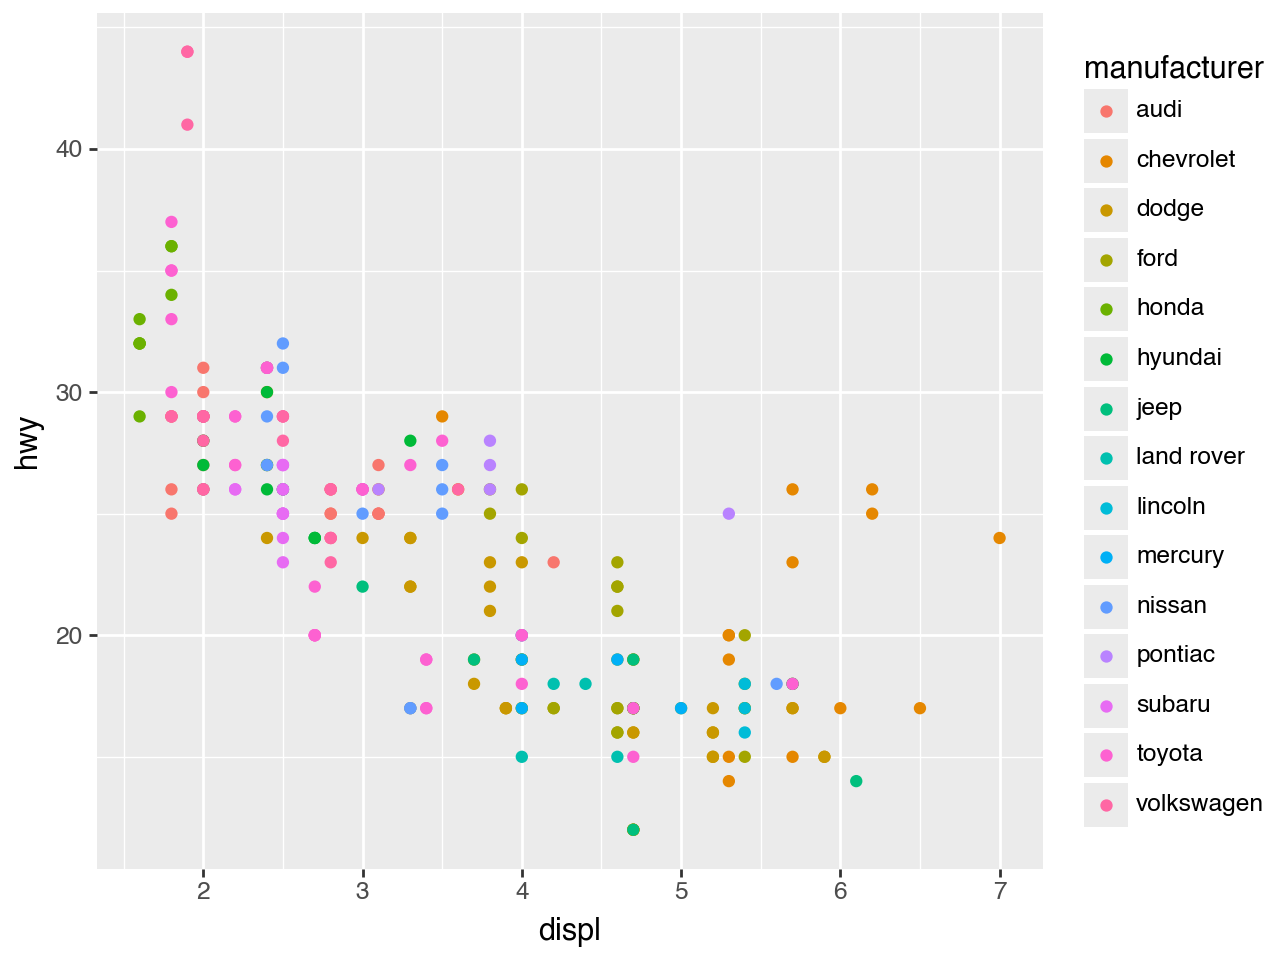

In [12]:
g1 = ggplot(mpg) + geom_point(aes("displ", "hwy", color="manufacturer"))
g2 = ggplot(mpg) + geom_boxplot(aes("displ", "hwy"))
g3 = ggplot(mpg) + geom_boxplot(aes("hwy", "displ")) + coord_flip()
g1